## AI/ML Internship

### Task 1: Data Cleaning & Preprocessing

#### 1. Importing necessary Library

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

In [2]:
import warnings
warnings.filterwarnings('ignore')

#### Loading the data and exploring the data

In [17]:
titanic_data = pd.read_csv('Titanic-Dataset.csv')

In [18]:
# Displaying basic information
print("Dataset Information:")
titanic_data.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [19]:
# Displaying the number of null values per column
print("\nNull Values per Column:")
print(titanic_data.isnull().sum())


Null Values per Column:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [20]:
# Displaying data types
print("\nData Types:")
titanic_data.dtypes


Data Types:


PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### 2. Handle missing values using mean, median and imputation

In [21]:
# Imputing missing 'Age' values with the median
titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)

In [22]:
# Filling missing 'Cabin' values with 'Unknown'
titanic_data['Cabin'].fillna('Unknown', inplace=True)

In [23]:
# Imputing missing 'Embarked' values with the mode
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)

In [24]:
print("\nNull Values after Imputation:")
print(titanic_data.isnull().sum())


Null Values after Imputation:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


#### 3. Convert categorical features into numerical using encoding

In [25]:
# One-hot encoding 'Sex'
titanic_data = pd.get_dummies(titanic_data, columns=['Sex'], drop_first=True)

In [26]:
# One-hot encoding 'Embarked'
titanic_data = pd.get_dummies(titanic_data, columns=['Embarked'], drop_first=True)

In [27]:
# Extracting the first letter from 'Cabin' to represent the deck
titanic_data['Deck'] = titanic_data['Cabin'].apply(lambda x: x[0] if pd.notna(x) else 'U')
titanic_data = pd.get_dummies(titanic_data, columns=['Deck'], drop_first=True)

In [28]:
# Droping the original 'Cabin' column
titanic_data.drop('Cabin', axis=1, inplace=True)

In [32]:
print("\nDataFrame after One-Hot Encoding:")
print(titanic_data.head())
print("--------------------------------------------------------------------------------------------")
print("\nData Types after Encoding:")
print(titanic_data.dtypes)


DataFrame after One-Hot Encoding:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  38.0      1      0   
2                             Heikkinen, Miss. Laina  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  35.0      1      0   
4                           Allen, Mr. William Henry  35.0      0      0   

             Ticket     Fare  Sex_male  Embarked_Q  Embarked_S  Deck_B  \
0         A/5 21171   7.2500      True       False        True   False   
1          PC 17599  71.2833     False       False       False   False   
2  STON/O2. 3101282   7.9250     False       False        True   Fals

#### 4. Normalize/standardize the numerical features

In [34]:
# Identifying numerical columns for scaling
numerical_columns = ['Age', 'Fare', 'SibSp', 'Parch']

In [35]:
# Initialize StandardScaler
scaler = StandardScaler()

In [38]:
# Applying standardization
titanic_data[numerical_columns] = scaler.fit_transform(titanic_data[numerical_columns])

In [39]:
print("\nDataFrame after Standardization:")
print(titanic_data.head())


DataFrame after Standardization:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name       Age     SibSp  \
0                            Braund, Mr. Owen Harris -0.565736  0.432793   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  0.663861  0.432793   
2                             Heikkinen, Miss. Laina -0.258337 -0.474545   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  0.433312  0.432793   
4                           Allen, Mr. William Henry  0.433312 -0.474545   

      Parch            Ticket      Fare  Sex_male  Embarked_Q  Embarked_S  \
0 -0.473674         A/5 21171 -0.502445      True       False        True   
1 -0.473674          PC 17599  0.786845     False       False       False   
2 -0.473674  STON/O2. 3101282 -0.488854     False       False

#### 5. Visualize outliers using boxplots and remove them

Text(0.5, 1.0, 'Boxplot of Age')

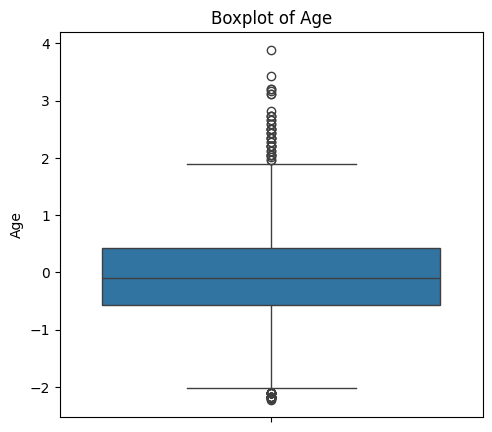

In [42]:
# Visualize outliers using boxplots for 'Age' and 'Fare'
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(y=titanic_data['Age'])
plt.title('Boxplot of Age')

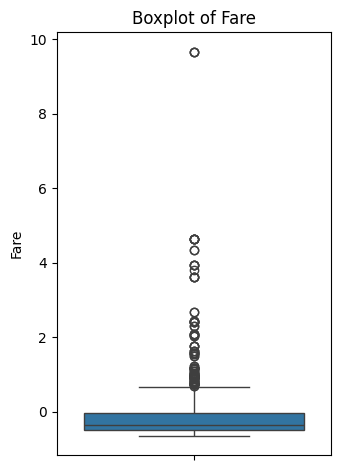

In [49]:
plt.subplot(1, 2, 2)
sns.boxplot(y=titanic_data['Fare'])
plt.title('Boxplot of Fare')
plt.tight_layout()
plt.show()

In [50]:
# Function to remove outliers using IQR
def remove_outliers_iqr(titanic_data, column):
    Q1 = titanic_data[column].quantile(0.25)
    Q3 = titanic_data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    titanic_data_filtered = titanic_data[(titanic_data[column] >= lower_bound) & (titanic_data[column] <= upper_bound)]
    return titanic_data_filtered

In [53]:
# Removing outliers from 'Age'
titanic_data_no_outliers_age = remove_outliers_iqr(titanic_data, 'Age')
print(f"\nShape after removing Age outliers: {titanic_data_no_outliers_age.shape}")


Shape after removing Age outliers: (825, 20)


In [54]:
# Removing outliers from 'Fare'
titanic_data_no_outliers_fare = remove_outliers_iqr(titanic_data_no_outliers_age, 'Fare')
print(f"Shape after removing Fare outliers: {titanic_data_no_outliers_fare.shape}")

Shape after removing Fare outliers: (718, 20)


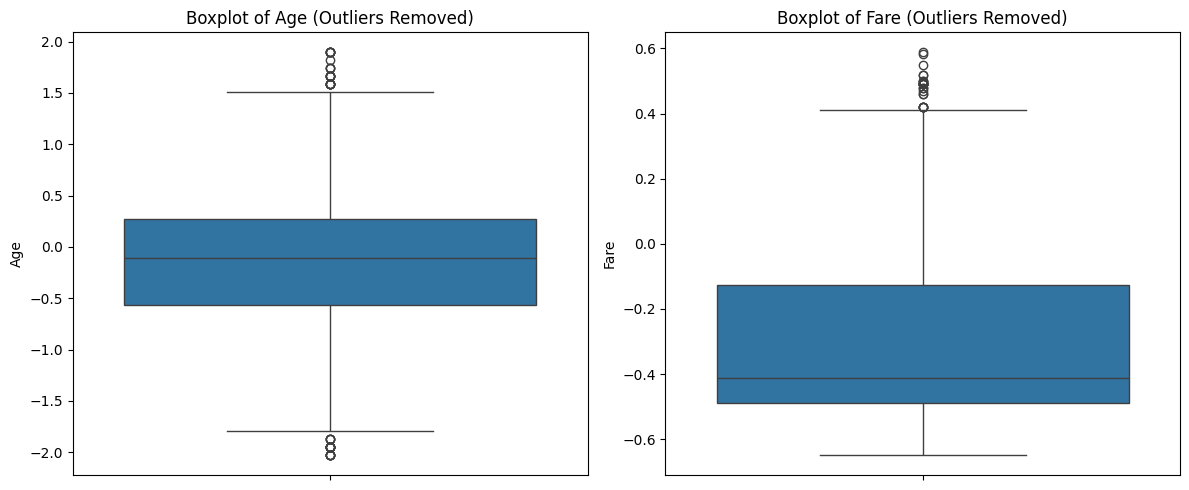


Final DataFrame after preprocessing:
   PassengerId  Survived  Pclass  \
0            1         0       3   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   

                                           Name       Age     SibSp     Parch  \
0                       Braund, Mr. Owen Harris -0.565736  0.432793 -0.473674   
2                        Heikkinen, Miss. Laina -0.258337 -0.474545 -0.473674   
3  Futrelle, Mrs. Jacques Heath (Lily May Peel)  0.433312  0.432793 -0.473674   
4                      Allen, Mr. William Henry  0.433312 -0.474545 -0.473674   
5                              Moran, Mr. James -0.104637 -0.474545 -0.473674   

             Ticket      Fare  Sex_male  Embarked_Q  Embarked_S  Deck_B  \
0         A/5 21171 -0.502445      True       False        True   False   
2  STON/O2. 3101282 -0.488854     False       False        True   False   
3            113803  0.420730    

In [56]:
# Visualize boxplots after outlier removal
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(y=titanic_data_no_outliers_fare['Age'])
plt.title('Boxplot of Age (Outliers Removed)')

plt.subplot(1, 2, 2)
sns.boxplot(y=titanic_data_no_outliers_fare['Fare'])
plt.title('Boxplot of Fare (Outliers Removed)')
plt.tight_layout()
plt.show()

print("\nFinal DataFrame after preprocessing:")
print(titanic_data_no_outliers_fare.head())

## 1. What are the different types of missing data?
Missing data can be categorized into three types:

- **Missing Completely at Random (MCAR)**: The missingness of data is entirely random and does not depend on any observed or unobserved data. For example, a survey respondent might skip a question by accident.

- **Missing at Random (MAR)**: The missingness is related to the observed data but not the missing data itself. For instance, older individuals might be less likely to report their income, but this can be predicted by their age.

- **Missing Not at Random (MNAR)**: The missingness is related to the missing data itself. For example, people with very high incomes may choose not to disclose their income, leading to missing values that are not random.

## 2. How do you handle categorical variables?

Categorical variables can be handled using various encoding techniques:

- **One-Hot Encoding**: Converts categorical variables into a format that can be provided to ML algorithms to do a better job in prediction. Each category is represented as a binary vector.

- **Label Encoding**: Converts each category into a unique integer. This is useful for ordinal data where the order matters.

- **Binary Encoding**: Combines the benefits of one-hot and label encoding, converting categories into binary numbers.

## 3. What is the difference between normalization and standardization?
- **Normalization**: Rescales the feature to a fixed range, usually [0, 1]. It is useful when the data does not follow a Gaussian distribution. The formula is:

\$
X' = \frac{X - X_{min}}{X_{max} - X_{min}}
\$

- **Standardization**: Rescales the feature to have a mean of 0 and a standard deviation of 1. It is useful when the data follows a Gaussian distribution. The formula is:

\$
X' = \frac{X - \mu}{\sigma}
\$

## 4. How do you detect outliers?
Outliers can be detected using various methods:

- **Statistical Methods**: Using Z-scores or the Interquartile Range (IQR) method. For example, values that lie beyond 1.5 times the IQR from the quartiles can be considered outliers.

- **Visualization**: Boxplots and scatter plots can visually indicate the presence of outliers.

```python
import seaborn as sns
import matplotlib.pyplot as plt

# Example of detecting outliers using a boxplot
sns.boxplot(x=titanic_data['Age'])
plt.title('Boxplot of Age')
plt.show()